<a href="https://colab.research.google.com/github/leandrosbo/TelecomX/blob/main/TELECON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1-1138139248.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
/tmp/ipython-input-1-1138139248.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map({"Yes": 1, "No": 0})
/tmp/ipython-input-1-1138139248.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

An√°lise conclu√≠da. Arquivo salvo como TelecomX_Dados_Limpos.csv


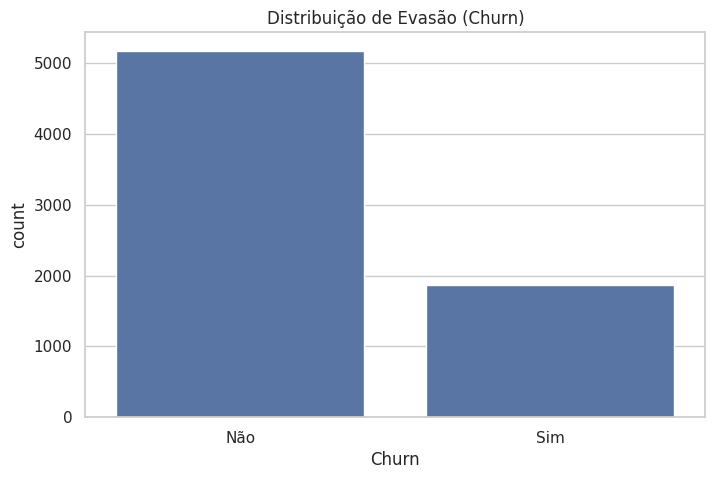

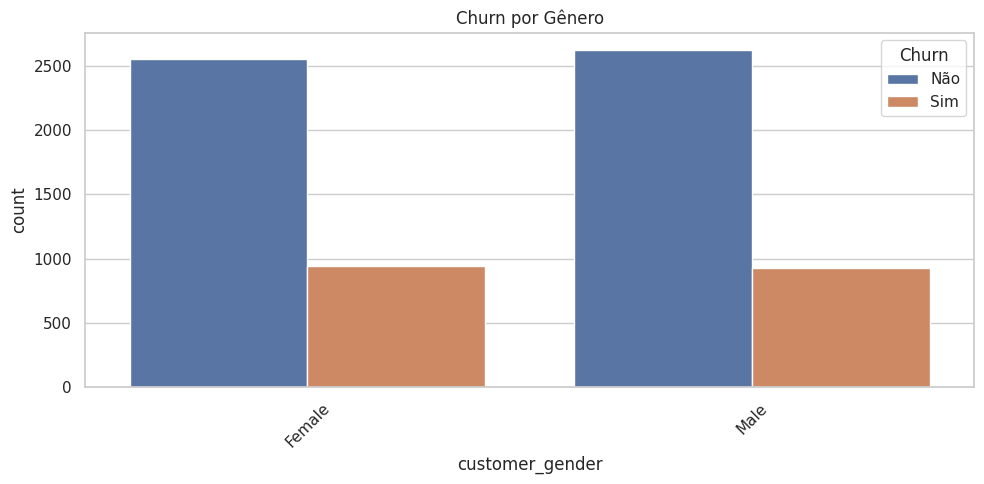

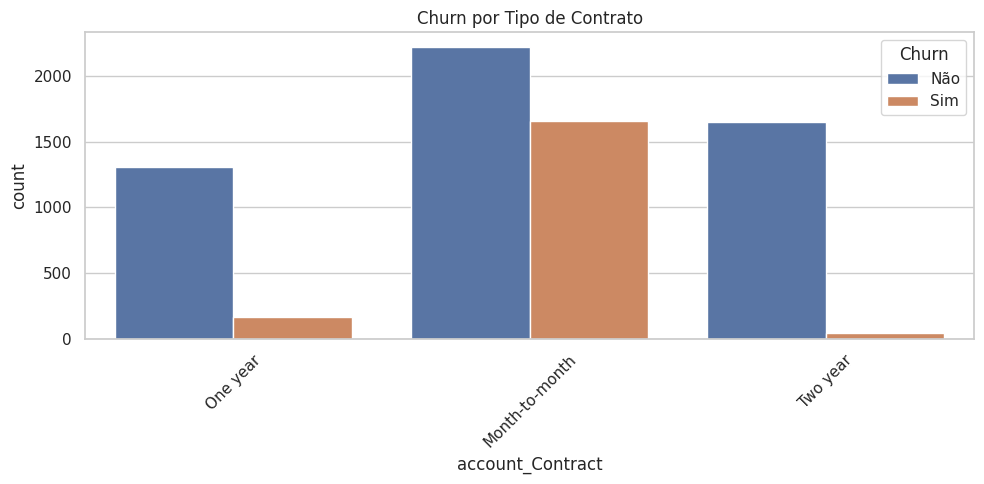

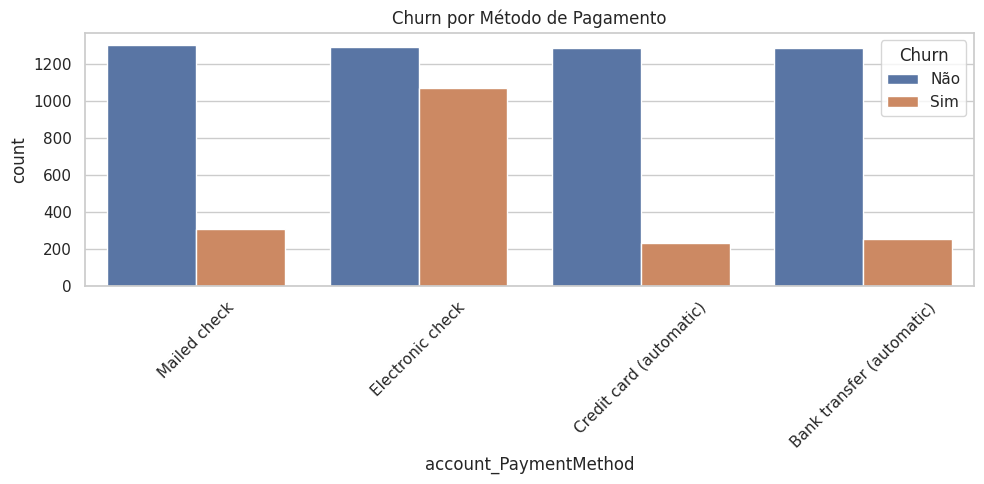

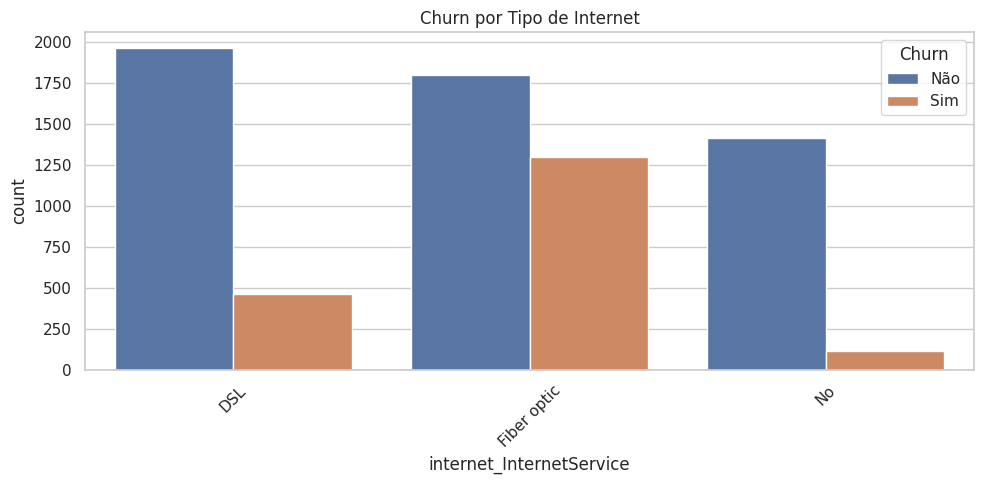

In [1]:
# telecom_churn_analysis.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# =======================
# 1. Carregamento dos Dados
# =======================
with open("TelecomX_Data.json", "r") as file:
    raw_data = json.load(file)

df = pd.json_normalize(raw_data, sep="_")

# =======================
# 2. Limpeza e Transforma√ß√£o
# =======================
df["account_Charges_Monthly"] = pd.to_numeric(df["account_Charges_Monthly"], errors="coerce")
df["account_Charges_Total"] = pd.to_numeric(df["account_Charges_Total"], errors="coerce")
df["Contas_Diarias"] = df["account_Charges_Monthly"] / 30

df["Churn"] = df["Churn"].replace("", pd.NA)
df = df.dropna(subset=["Churn"])
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Bin√°rias em 0 e 1
bin_cols = [
    "customer_Partner", "customer_Dependents", "phone_PhoneService",
    "phone_MultipleLines", "account_PaperlessBilling"
]
for col in bin_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

# =======================
# 3. An√°lise Explorat√≥ria
# =======================
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(x="Churn", data=df)
plt.title("Distribui√ß√£o de Evas√£o (Churn)")
plt.xticks([0, 1], ["N√£o", "Sim"])
plt.savefig("grafico_churn.png")

# Gr√°ficos categ√≥ricos
def churn_barplot(col, title, filename):
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend(title="Churn", labels=["N√£o", "Sim"])
    plt.tight_layout()
    plt.savefig(filename)

churn_barplot("customer_gender", "Churn por G√™nero", "churn_genero.png")
churn_barplot("account_Contract", "Churn por Tipo de Contrato", "churn_contrato.png")
churn_barplot("account_PaymentMethod", "Churn por M√©todo de Pagamento", "churn_pagamento.png")
churn_barplot("internet_InternetService", "Churn por Tipo de Internet", "churn_internet.png")

# =======================
# 4. Exporta√ß√£o Final
# =======================
df.to_csv("TelecomX_Dados_Limpos.csv", index=False)
print("An√°lise conclu√≠da. Arquivo salvo como TelecomX_Dados_Limpos.csv")


üìä Relat√≥rio de An√°lise de Evas√£o de Clientes - Telecom X
üìå Introdu√ß√£o
Este projeto tem como objetivo analisar os dados dos clientes da empresa fict√≠cia Telecom X para entender os fatores relacionados √† evas√£o (churn). A empresa enfrenta altos √≠ndices de cancelamentos e busca insights que orientem a√ß√µes estrat√©gicas de reten√ß√£o.

üßπ Limpeza e Tratamento de Dados
Fontes:
Dados fornecidos em JSON estruturado.

Dicion√°rio de dados explicando o significado de cada vari√°vel.

Principais Etapas:
Normaliza√ß√£o dos dados aninhados (customer, phone, internet, account).

Convers√£o de colunas bin√°rias como "Yes"/"No" para 1/0.

Convers√£o de valores num√©ricos como faturamento mensal e total.

Cria√ß√£o da coluna Contas_Diarias, calculada como Charges.Monthly / 30.

üìà An√°lise Explorat√≥ria de Dados (EDA)
Distribui√ß√£o de Churn
Aproximadamente 1 a cada 4 clientes deixaram a empresa ‚Äî um n√∫mero relevante que merece aten√ß√£o.

Principais Achados:
Contrato mensal est√° fortemente relacionado com maior evas√£o.

Clientes com pagamento via "Electronic check" cancelam mais frequentemente.

Clientes com internet "Fiber optic" t√™m maior churn do que DSL ou sem internet.

O g√™nero n√£o tem impacto vis√≠vel na evas√£o.

üîç Conclus√µes e Insights
Fideliza√ß√£o: Contratos mais longos (1 ou 2 anos) est√£o associados a maior reten√ß√£o.

Pagamentos autom√°ticos sugerem maior lealdade dos clientes.

Usu√°rios de internet de alta velocidade (Fiber) podem estar insatisfeitos com o servi√ßo, indicando necessidade de investiga√ß√£o qualitativa.